In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import cvxpy as cp
import numpy as np

In [2]:
def create_MDP1():
    # create the state map
    S = np.arange(10*10).reshape(10,10).T
    
    # create the corresponding reward functions
    R = np.zeros((10,10))
    R[4:6,1:3] = -10
    R[8:10,2:4] = -10
    R[2:4,5:7] = -10
    
    R[9,9] = 1
    
    return (S,R)

In [3]:
def create_MDP2():
    # create the state map
    S = np.arange(10*10).reshape(10,10).T
    
    # create the corresponding reward functions
    R = np.zeros((10,10))
    R[1:7,4] = -100
    R[3:8,8] = -100
    R[1,5:7] = -100
    R[1:4,6] = -100
    R[3,7] = -100
    R[7:9,6] = -100
    R[7,7] = -100
    R[9,9] = 10

    return (S,R)

In [4]:
def create_heatmap(X,title="Empty"):
    c = plt.pcolor(X,cmap='RdBu',edgecolors='k',linewidths=4)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.colorbar()
    #plt.show()

In [5]:
def create_rewardmap(X,title="Empty"):
    #plt.figure(figsize=(10,10))
    plt.pcolor(np.zeros((10,10)) , cmap='gray',edgecolors='white',linewidth=4)
    for i in np.arange(10):
        for j in np.arange(10):
            plt.text(j+0.5,i+0.5,"{:.3f}".format(float(X[i,j])),color='white',size=10,ha='center', va='center',weight='bold')
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.axis('equal')

In [6]:
def create_policymap(policy,title="Empty"):
    #plt.figure(figsize=(10,10))
    plt.pcolor(np.zeros((10,10)) , cmap='gray',edgecolors='white',linewidth=4)
    selections = np.array(['\u2190','\u2191','\u2192','\u2193'])
    for i in np.arange(10):
        for j in np.arange(10):
            plt.text(j+0.5,i+0.5,selections[int(policy[i,j])],color='white',size=30,ha='center', va='center')
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.axis('equal')

In [7]:
def create_difference_policymap(policy_guess,policy_true,title="empty"):
    #plt.figure(figsize=(10,10))
    plt.pcolor(np.zeros((10,10)) , cmap='gray',edgecolors='white',linewidth=4)
    selections = np.array(['\u2190','\u2191','\u2192','\u2193'])
    arrow_colors = ['red','green']
    for i in np.arange(10):
        for j in np.arange(10):
            plt.text(j+0.5,i+0.5,selections[int(policy_guess[i,j])],
                     color = arrow_colors[int(policy_guess[i,j])==int(policy_true[i,j])],
                     size=30,ha='center', va='center')
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.axis('equal')

In [8]:
def value_iteration(environment,threshold,discount_factor):
    S = environment.state_space
    N_actions = environment.N_actions
    V = np.zeros(S.shape); delta = 1
    
    while delta > threshold:
        delta = 0
        for s in S.ravel():
            x,y = np.where(S==s)
            v = V[x,y]
            Vs = np.zeros((4,))
            for a in np.arange(N_actions):
                states,rewards,p,coordinates = environment.get_transitions(s,a)
                x_,y_ = zip(*coordinates)
                Vs[a] = np.sum(p*(rewards + discount_factor*V[x_,y_]))

            best_action = np.argmax(Vs) 
                
            delta = max(delta,np.abs(Vs[best_action] - v))
            V[x,y] = Vs[best_action]
            
    # compute the optimal policy based on the value iteration
    policy = np.zeros(S.shape)
    for s in S.ravel():
        x,y = np.where(S==s)
        Vs = np.zeros((4,))
        for a in np.arange(N_actions):
            states,rewards,p,coordinates = environment.get_transitions(s,a)
            x_,y_ = zip(*coordinates)
            Vs[a] = np.sum(p*(rewards + discount_factor*V[x_,y_]))

        policy[x,y] = np.argmax(Vs) 

            
    return V,policy

In [9]:
def value_iteration_visualize(environment,threshold,discount_factor):
    S = environment.state_space
    N_actions = environment.N_actions
    V = np.zeros(S.shape); delta = 1
    N = 1
    while delta > threshold:
        delta = 0
        for s in S.ravel():
            x,y = np.where(S==s)
            v = V[x,y]
            Vs = np.zeros((4,))
            for a in np.arange(N_actions):
                states,rewards,p,coordinates = environment.get_transitions(s,a)
                x_,y_ = zip(*coordinates)
                Vs[a] = np.sum(p*(rewards + discount_factor*V[x_,y_]))

            best_action = np.argmax(Vs) 
                
            delta = max(delta,np.abs(Vs[best_action] - v))
            V[x,y] = Vs[best_action]
        N +=1
        
    print("Converges in {:d} steps".format(N))
    show_every = np.floor(np.linspace(1,N,5)).tolist()
    V = np.zeros(S.shape); delta = 1
    N = 1
    delta = 1
    while delta > threshold:
        delta = 0
        for s in S.ravel():
            x,y = np.where(S==s)
            v = V[x,y]
            Vs = np.zeros((4,))
            for a in np.arange(N_actions):
                states,rewards,p,coordinates = environment.get_transitions(s,a)
                x_,y_ = zip(*coordinates)
                Vs[a] = np.sum(p*(rewards + discount_factor*V[x_,y_]))

            best_action = np.argmax(Vs) 
                
            delta = max(delta,np.abs(Vs[best_action] - v))
            V[x,y] = Vs[best_action]
        
        if N in show_every:
            create_heatmap(V,"State-Value Function @ N={:d}".format(N))
            plt.show()
        
        N +=1
    if N in show_every:
        create_heatmap(V,"State-Value Function @ N={:d}".format(N))
        plt.show()

In [10]:
np.floor(np.linspace(1,22,5))

array([ 1.,  6., 11., 16., 22.])

In [11]:
class RL_environment:
    def __init__(self,S,R,A,w):
        self.state_space = S
        self.reward_space = R
        self.N_actions = A
        self.w = w
        
    def step(self,current_state,action):
        x,y = np.where(self.state_space==current_state)
        p = np.array([self.w/4]*self.N_actions)
        p[action] = p[action] + 1-self.w
        
        # action is random to extent ...
        action = np.random.choice(self.N_actions,p=p)
        
        min_border_right = self.state_space.shape[1] - 1
        min_border_down = self.state_space.shape[0] - 1
        
        if action == 0:
            y = max(y-1,0)
        elif action == 1:
            x = max(x-1,0)
        elif action == 2:
            y = min(y+1,min_border_right)
        else: 
            x = min(x+1,min_border_down)

        x = int(x); y = int(y)
        return self.state_space[x,y],self.reward_space[x,y]
    
    def get_transitions(self,current_state,action):
        """
        returns states, rewards, probabilities, coordinates for all non-zero states
        """
        p = np.array([self.w/4]*self.N_actions)
        p[action] = p[action] + 1-self.w
        states = np.zeros((4,))
        rewards = np.zeros((4,))
        coordinates = []
        
        min_border_right = int(self.state_space.shape[1] - 1)
        min_border_down = int(self.state_space.shape[0] - 1)
        
        for a in np.arange(self.N_actions):
            
            x,y = np.where(self.state_space==current_state)
            
            if a == 0:
                y = max(y-1,0)
            elif a == 1:
                x = max(x-1,0)
            elif a == 2:
                y = min(y+1,min_border_right)
            else: 
                x = min(x+1,min_border_down)
                
            x = int(x); y = int(y)
                
            states[a] = self.state_space[x,y]
            rewards[a] = self.reward_space[x,y]
            coordinates.append((x,y))
        return states,rewards,p,coordinates
    
    def get_transition_probabiliy_vector(self,current_state,action):
        num_states = np.prod(self.state_space.shape)
        P = np.zeros((1,num_states))
        states,rewards,probs,indices = self.get_transitions(current_state,int(action))
        flat_indices = np.ravel_multi_index(list(zip(*indices)),dims=self.state_space.shape)
        for j,idx in enumerate(flat_indices):
            P[0,idx] +=  probs[j]
        
        return P

In [12]:
"""
num_states = np.prod(S1.shape)
P_optimal = np.zeros((num_states,num_states))

for i,(s,o) in enumerate(zip(S1.ravel(),policy1.ravel().astype(np.int))):
    states,rewards,probs,indices = environment2.get_transitions(s,o)
    flat_indices = np.ravel_multi_index(list(zip(*indices)),dims=S1.shape)
    P_optimal[i,flat_indices] = probs 
    
R_max = np.max(R1)
"""

'\nnum_states = np.prod(S1.shape)\nP_optimal = np.zeros((num_states,num_states))\n\nfor i,(s,o) in enumerate(zip(S1.ravel(),policy1.ravel().astype(np.int))):\n    states,rewards,probs,indices = environment2.get_transitions(s,o)\n    flat_indices = np.ravel_multi_index(list(zip(*indices)),dims=S1.shape)\n    P_optimal[i,flat_indices] = probs \n    \nR_max = np.max(R1)\n'

In [13]:
def get_optimal_policy_transition_matrix(environment,policy):
    num_states = np.prod(environment.state_space.shape)
    P_optimal = np.zeros((num_states,num_states))
    for i,(s,o) in enumerate(zip(environment.state_space.ravel(),policy.ravel().astype(np.int))):
        P_optimal[i,:] = environment.get_transition_probabiliy_vector(s,o)
    
    return P_optimal

In [14]:
def get_same_action_policy_transition_matrices(environment):
    P_As = []
    num_states = np.prod(environment.state_space.shape)

    for a in np.arange(environment.N_actions):
        P_As.append(np.zeros((num_states,num_states)))
        for i,s in enumerate(environment.state_space.ravel()):
            P_As[a][i,:] = environment.get_transition_probabiliy_vector(s,a)
            
    return P_As

In [15]:
def get_b_D_block_matrices(environment,discount_factor,policy,p_optimal,p_as):
    R_max = np.abs(environment.reward_space).max()
    num_states = np.prod(environment.state_space.shape)

    # create b vector
    zero_column = np.zeros((num_states,1))
    ones_column = np.ones((num_states,1))

    
    Ds = []
    bs = []
    
    zero_block = np.zeros((num_states,num_states))
    identity = np.eye(num_states)
    
    for a in np.arange(environment.N_actions):
        special_delete = np.eye(num_states)
        #special_delete[policy.ravel()==a] = 0 
        
        non_optimal_actions = policy.ravel()!=a
        
        special_delete = special_delete[non_optimal_actions]
        block_matrix = p_optimal-p_as[a]
        #block_matrix[policy.ravel()==a] = 0
        block_matrix = block_matrix[non_optimal_actions]
        
        row1 = np.hstack((
                          -np.matmul(block_matrix,np.linalg.inv(np.eye(num_states)-discount_factor*p_optimal)),    
                           zero_block[non_optimal_actions],
                           special_delete
                            ))

        row2 = np.hstack((
                          -np.matmul(block_matrix,np.linalg.inv(identity-discount_factor*p_optimal)),    
                           zero_block[non_optimal_actions],
                           zero_block[non_optimal_actions]
                            ))

        row3 = np.hstack((
                           -identity,
                           -identity,
                           zero_block
                            ))

        row4 = np.hstack((
                           identity,
                           -identity,
                           zero_block
                            ))

        row5 = np.hstack((
                           identity,
                           zero_block,
                          zero_block      
                            ))

        row6 = np.hstack((
                           -identity,
                           zero_block,
                          zero_block       
                            ))

        Ds.append(np.vstack((row1,row2,row3,row4,row5,row6)))
        
        bs.append(np.vstack(( 
                   zero_column[non_optimal_actions] , 
                    zero_column[non_optimal_actions],
                   zero_column,
                   zero_column,
                   R_max * ones_column,
                   R_max * ones_column)
        ))
    return bs,Ds

In [16]:
def get_c_block_matrices(environment,lambda1):
    R_max = np.abs(environment.reward_space).max()
    num_states = np.prod(environment.state_space.shape)

    # create b vector
    zero_column = np.zeros((num_states,1))
    ones_column = np.ones((num_states,1))   
    
    c= np.vstack(( 
        zero_column , 
        -lambda1 * ones_column,
        ones_column
        ))
    
    return c
    

In [17]:
def linear_solve_IRL(environment,bs,c,Ds):
    np.random.seed(1)
    num_states = np.prod(environment.state_space.shape)

    # Construct the problem.
    x = cp.Variable(shape=(3*num_states,1))

    objective = cp.Maximize(c.T@x)
    constraints = [Ds[a]@x <= bs[a] for a in np.arange(environment.N_actions)]
    prob = cp.Problem(objective, constraints)

    # The optimal objective value is returned by `prob.solve()`.
    result = prob.solve()
    # The optimal value for x is stored in `x.value`.
    return x.value[:num_states]

# PART 1

## Question 1

In [18]:
S1,R1 = create_MDP1()

In [19]:
S2,R2 = create_MDP2()

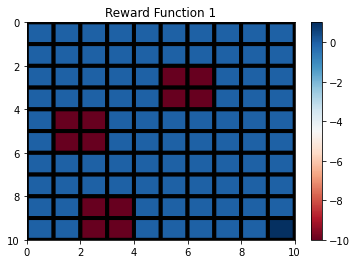

In [20]:
create_heatmap(R1,title="Reward Function 1")

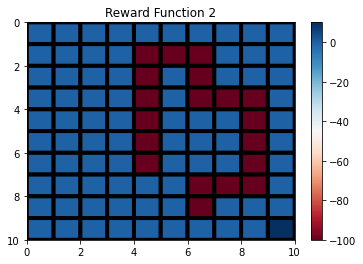

In [21]:
create_heatmap(R2,title="Reward Function 2")

## Question 2

In [22]:
w = .1
N_actions = 4
discount_factor = 0.8

environment1 = RL_environment(S1,R1,N_actions,w)

In [23]:
threshold = 1e-2; 
V1,policy1 = value_iteration(environment1,threshold,discount_factor)

Converges in 22 steps


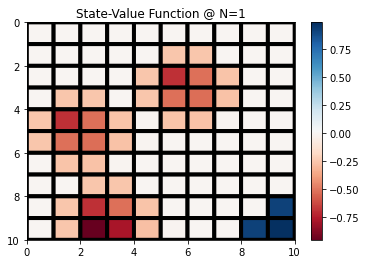

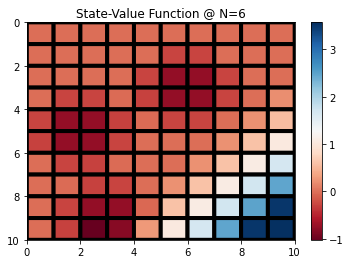

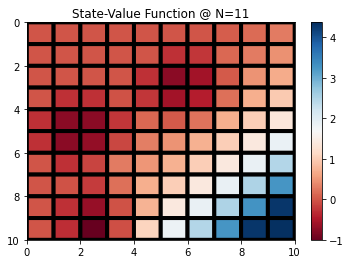

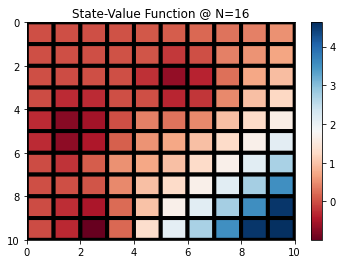

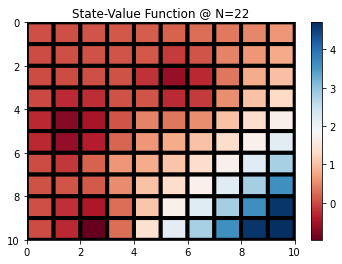

In [24]:
value_iteration_visualize(environment1,threshold,discount_factor)

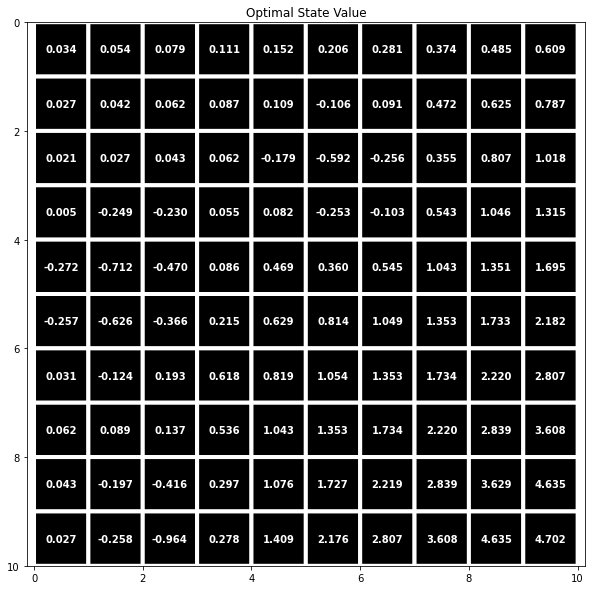

In [25]:
plt.figure(figsize=(10,10))
create_rewardmap(V1,"Optimal State Value")

## Question 3

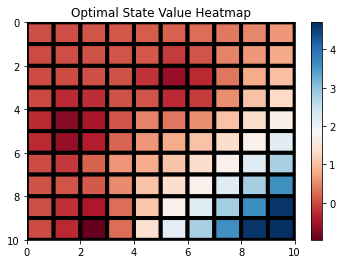

In [26]:
create_heatmap(V1,title="Optimal State Value Heatmap")

## Question 4

C:\Users\lpott\anaconda3\envs\comsci247\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


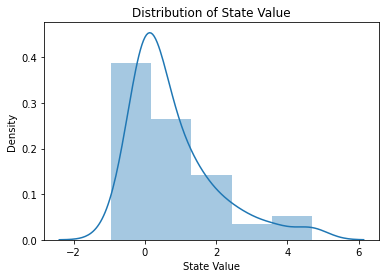

In [27]:
sns.distplot(V1.ravel(),bins=5)
plt.xlabel("State Value"); plt.title("Distribution of State Value");
plt.show()

## Question 5

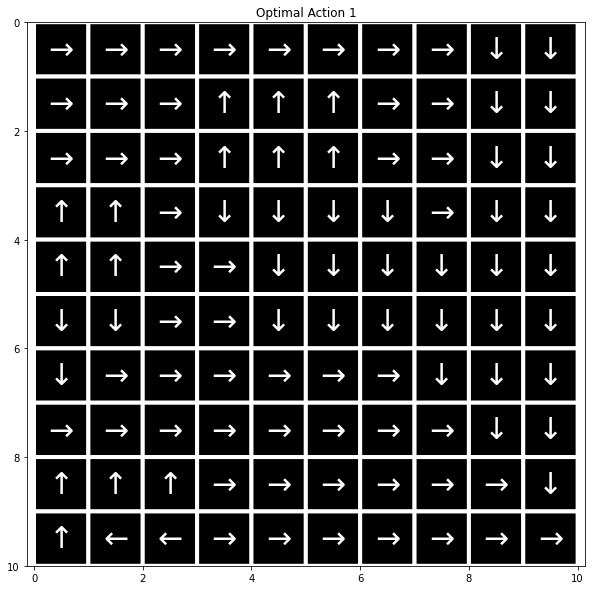

In [28]:
plt.figure(figsize=(10,10))
create_policymap(policy1,title="Optimal Action 1")

## Question 6

In [29]:
w = .1
N_actions = 4
discount_factor = 0.8

environment2 = RL_environment(S2,R2,N_actions,w)

In [30]:
threshold = 1e-2
V2,policy2 = value_iteration(environment2,threshold,discount_factor)

Converges in 32 steps


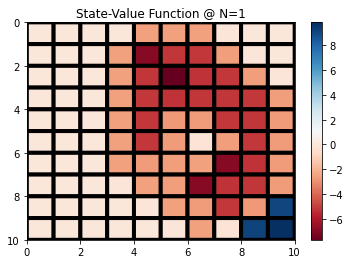

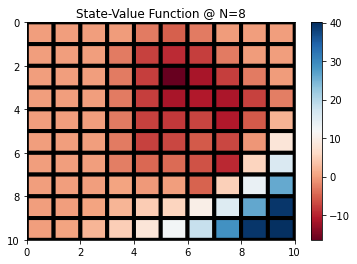

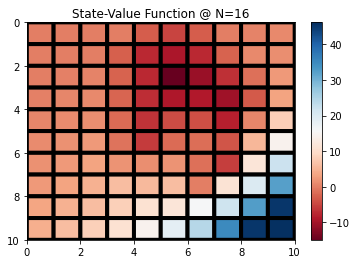

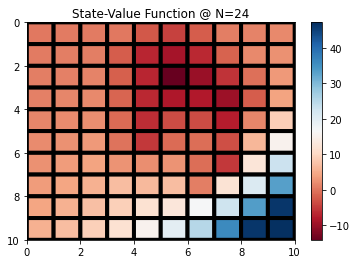

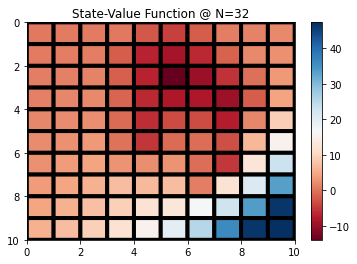

In [31]:
value_iteration_visualize(environment2,threshold,discount_factor)

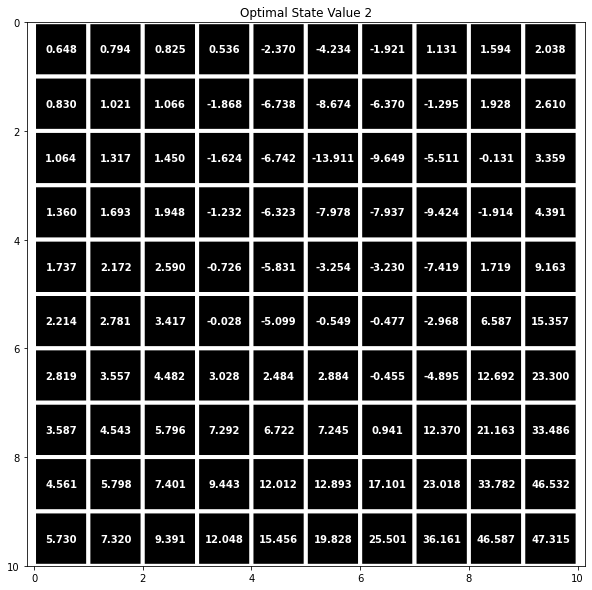

In [32]:
plt.figure(figsize=(10,10))
create_rewardmap(V2,title="Optimal State Value 2")

## Question 7

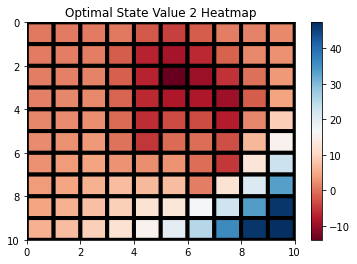

In [33]:
create_heatmap(V2,"Optimal State Value 2 Heatmap")

## Question 8 

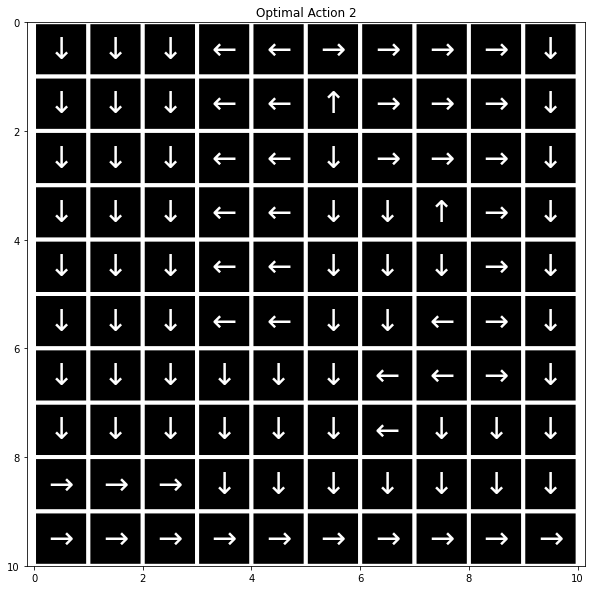

In [34]:
plt.figure(figsize=(10,10))
create_policymap(policy2,title="Optimal Action 2")

C:\Users\lpott\anaconda3\envs\comsci247\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


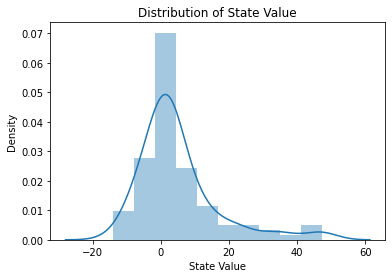

In [35]:
sns.distplot(V2.ravel(),bins=10)
plt.xlabel("State Value"); plt.title("Distribution of State Value");
plt.show()

## Question 9

In [36]:
w = .6
N_actions = 4
discount_factor = 0.8

environment2_modified = RL_environment(S2,R2,N_actions,w)

In [37]:
threshold = 1e-2
V2_modified,policy2_modified = value_iteration(environment2_modified,threshold,discount_factor)

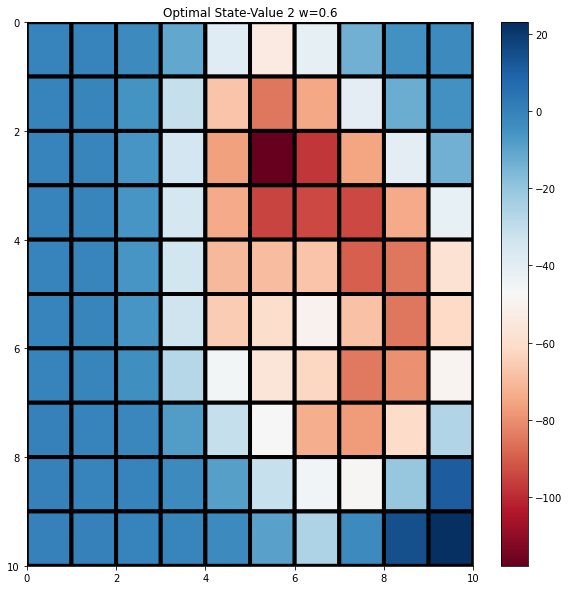

In [38]:
plt.figure(figsize=(10,10))
create_heatmap(V2_modified,"Optimal State-Value 2 w=0.6")

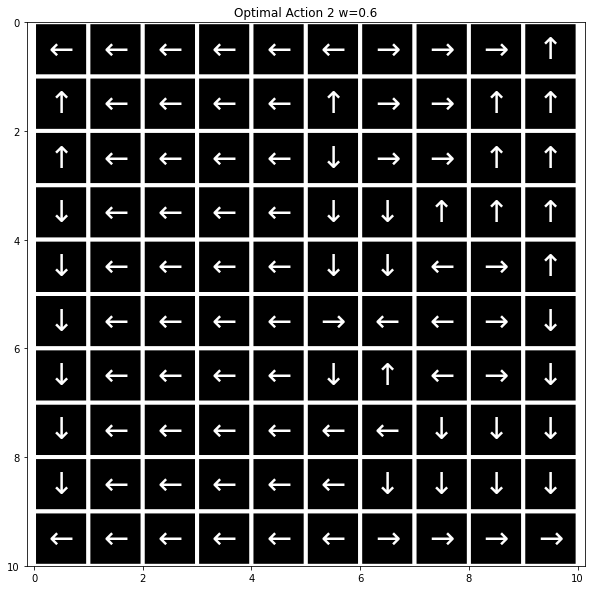

In [39]:
plt.figure(figsize=(10,10))
create_policymap(policy2_modified,"Optimal Action 2 w=0.6")

# PART 2

## Question 10
* handwritten as of now

## Question 11

In [40]:
w = .1

In [41]:
from tqdm import tqdm

In [42]:
R_max = environment1.reward_space.max()
P_optimal = get_optimal_policy_transition_matrix(environment1,policy1)
P_As = get_same_action_policy_transition_matrices(environment1)
b,Ds = get_b_D_block_matrices(environment1,discount_factor,policy1,P_optimal,P_As)

IRL_1_accuracy = []
for lambda1 in tqdm(np.linspace(0,5,500)):
    c = get_c_block_matrices(environment1,lambda1)
    R_IRL = linear_solve_IRL(environment1,b,c,Ds).reshape(environment1.reward_space.shape)

    environment_IRL = RL_environment(environment1.state_space,R_IRL,N_actions,w)
    _,policy_IRL = value_iteration(environment_IRL,threshold,discount_factor)
    IRL_1_accuracy.append((policy_IRL == policy1).mean())

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [04:53<00:00,  1.70it/s]


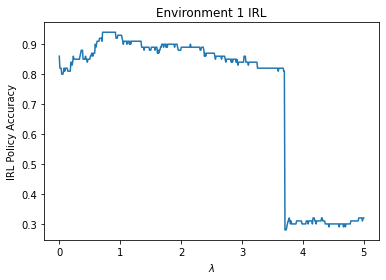

In [43]:
plt.plot(np.linspace(0,5,500),IRL_1_accuracy)
plt.xlabel("$\lambda$"); plt.ylabel("IRL Policy Accuracy"); plt.title("Environment 1 IRL")
plt.show()

## Question 12

In [44]:
lambda_best = np.linspace(0,5,500)[np.argmax(IRL_1_accuracy)]
accuracy_best = np.max(IRL_1_accuracy)
print("Best recorded lambda: {:.5f}".format(lambda_best))
print("Best recorded accuracy: {:.5f}".format(accuracy_best))

Best recorded lambda: 0.71142
Best recorded accuracy: 0.94000


## Question 13

In [45]:
c = get_c_block_matrices(environment1,lambda_best)
R_IRL = linear_solve_IRL(environment1,b,c,Ds).reshape(environment1.reward_space.shape)

environment_IRL = RL_environment(environment1.state_space,R_IRL,N_actions,w)
value_IRL,policy_IRL = value_iteration(environment_IRL,threshold,discount_factor)

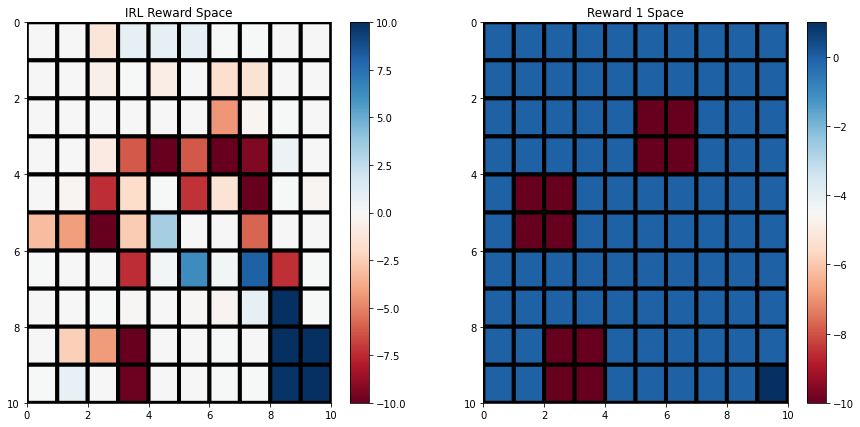

In [46]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
create_heatmap(R_IRL,"IRL Reward Space")
plt.subplot(1,2,2)
create_heatmap(environment1.reward_space,'Reward 1 Space')

## Question 14

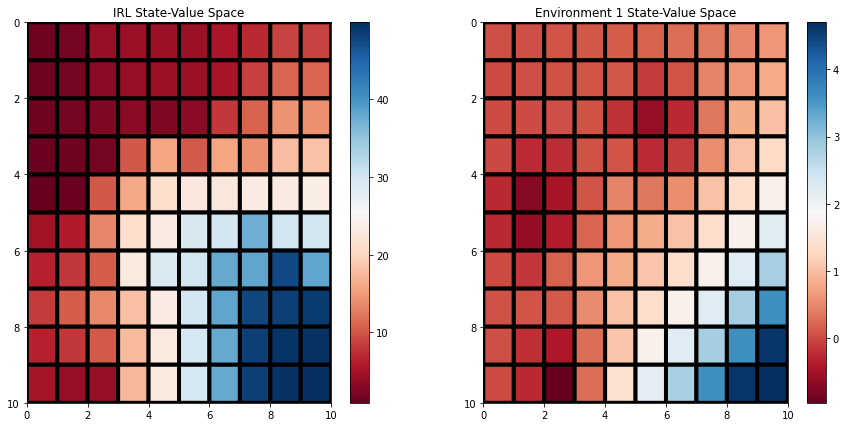

In [47]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
create_heatmap(value_IRL,"IRL State-Value Space")
plt.subplot(1,2,2)
create_heatmap(V1,'Environment 1 State-Value Space')

## Question 15
* to be typed . . .

## Question 16

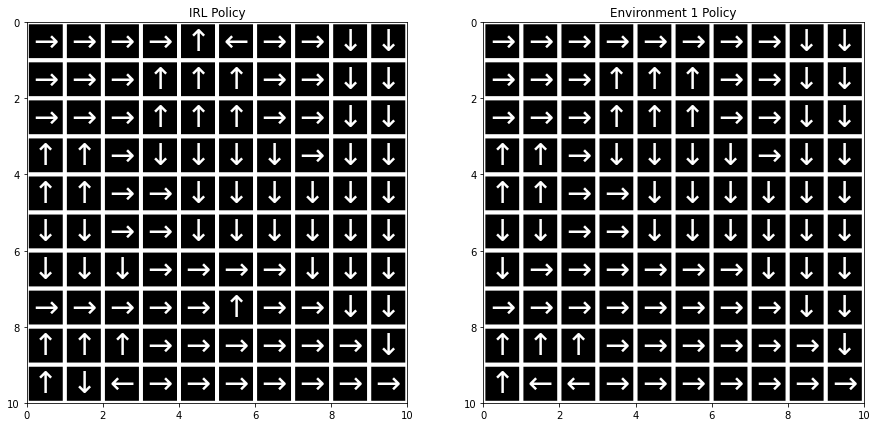

In [48]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
create_policymap(policy_IRL,"IRL Policy")
plt.subplot(1,2,2)
create_policymap(policy1,'Environment 1 Policy')

## Question 17
* to be typed in report

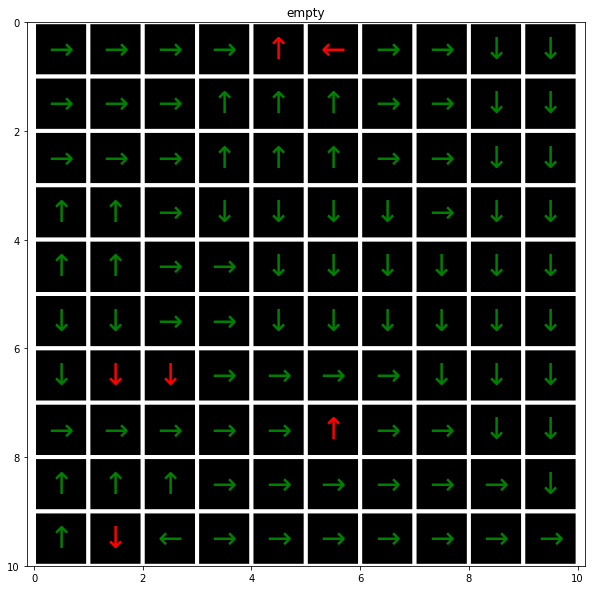

In [49]:
plt.figure(figsize=(10,10))
create_difference_policymap(policy_IRL,policy1)

## Question 18

In [50]:
P_optimal = get_optimal_policy_transition_matrix(environment2,policy2)
P_As = get_same_action_policy_transition_matrices(environment2)
b,Ds = get_b_D_block_matrices(environment2,discount_factor,policy2,P_optimal,P_As)

IRL_2_accuracy = []
for lambda1 in tqdm(np.linspace(0,5,500)):
    c = get_c_block_matrices(environment2,lambda1)
    R_IRL = linear_solve_IRL(environment2,b,c,Ds).reshape(environment2.reward_space.shape)

    environment_IRL = RL_environment(environment2.state_space,R_IRL,N_actions,w)
    _,policy_IRL = value_iteration(environment_IRL,threshold,discount_factor)
    IRL_2_accuracy.append((policy_IRL == policy2).mean())

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [04:10<00:00,  1.99it/s]


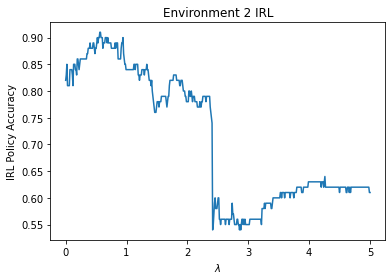

In [51]:
plt.plot(np.linspace(0,5,500),IRL_2_accuracy)
plt.xlabel("$\lambda$"); plt.ylabel("IRL Policy Accuracy"); plt.title("Environment 2 IRL")
plt.show()

## Question 19

In [52]:
lambda_best = np.linspace(0,5,500)[np.argmax(IRL_2_accuracy)]
accuracy_best = np.max(IRL_2_accuracy)
print("Best recorded lambda: {:.5f}".format(lambda_best))
print("Best recorded accuracy: {:.5f}".format(accuracy_best))

Best recorded lambda: 0.56112
Best recorded accuracy: 0.91000


## Question 20

In [53]:
c = get_c_block_matrices(environment2,lambda_best)
R_IRL = linear_solve_IRL(environment2,b,c,Ds).reshape(environment2.reward_space.shape)

environment_IRL = RL_environment(environment2.state_space,R_IRL,N_actions,w)
value_IRL,policy_IRL = value_iteration(environment_IRL,0.01,discount_factor)

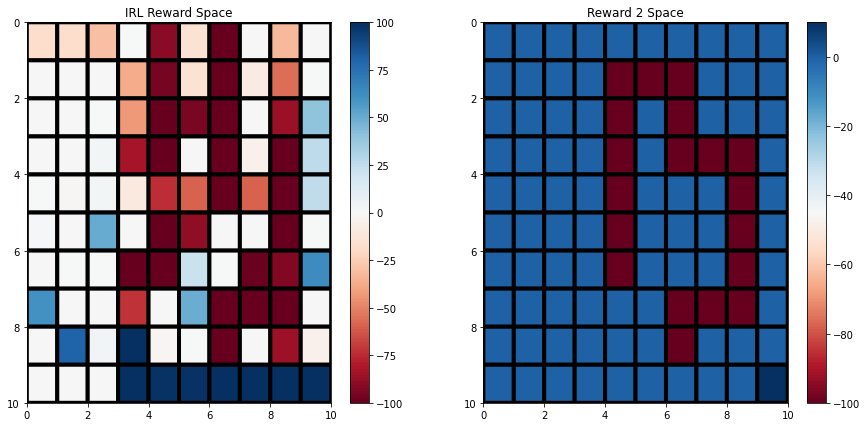

In [54]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
create_heatmap(R_IRL,"IRL Reward Space")
plt.subplot(1,2,2)
create_heatmap(environment2.reward_space,'Reward 2 Space')

## Question 21

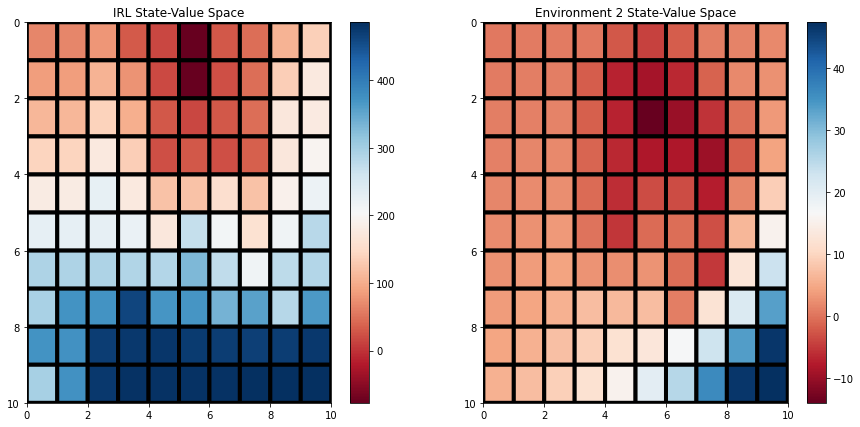

In [55]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
create_heatmap(value_IRL,"IRL State-Value Space")
plt.subplot(1,2,2)
create_heatmap(V2,'Environment 2 State-Value Space')

## Question 22
* to be typed in the report

## Question 23

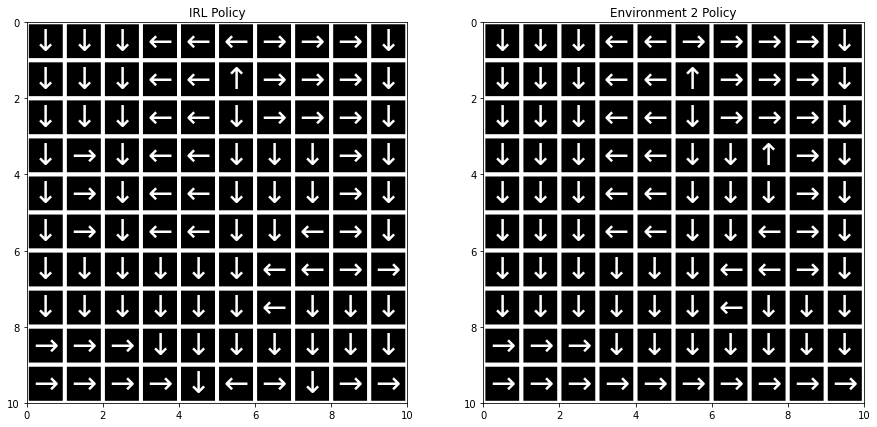

In [56]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
create_policymap(policy_IRL,"IRL Policy")
plt.subplot(1,2,2)
create_policymap(policy2,'Environment 2 Policy')

## Question 24

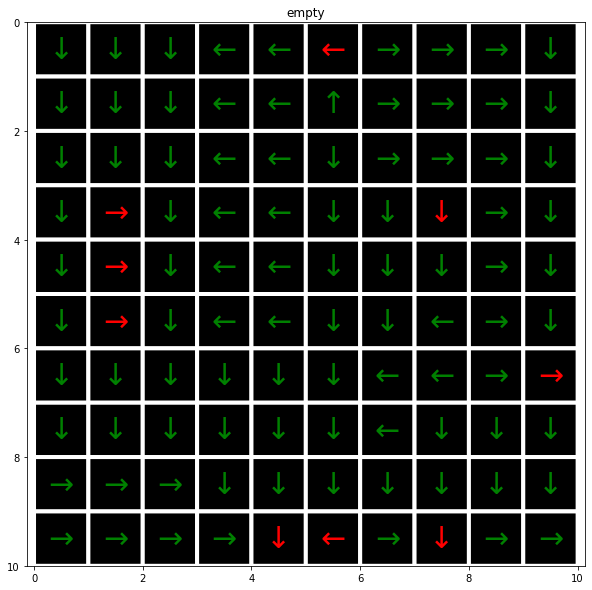

In [57]:
plt.figure(figsize=(10,10))
create_difference_policymap(policy_IRL,policy2)

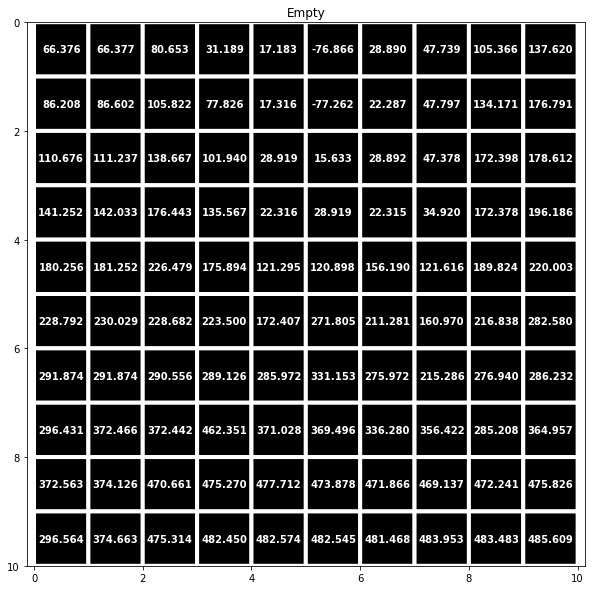

In [58]:
plt.figure(figsize=(10,10))
create_rewardmap(value_IRL)

## Question 25

In [60]:
threshold=0.00000001
discount_factor = 0.8

In [61]:
R_max = environment2.reward_space.max()
P_optimal = get_optimal_policy_transition_matrix(environment2,policy2)
P_As = get_same_action_policy_transition_matrices(environment2)
b,Ds = get_b_D_block_matrices(environment2,discount_factor,policy2,P_optimal,P_As)

IRL_2_accuracy = []
for lambda1 in tqdm(np.linspace(0,5,500)):
    c = get_c_block_matrices(environment2,lambda1)
    R_IRL = linear_solve_IRL(environment2,b,c,Ds).reshape(environment2.reward_space.shape)

    environment_IRL = RL_environment(environment2.state_space,R_IRL,N_actions,w)
    _,policy_IRL = value_iteration(environment_IRL,threshold,discount_factor)
    IRL_2_accuracy.append((policy_IRL == policy2).mean())

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [09:18<00:00,  1.12s/it]


In [78]:
lambda_best = np.linspace(0,5,500)[np.argmax(IRL_2_accuracy)]
accuracy_best = np.max(IRL_2_accuracy)
print("Best recorded lambda: {:.5f}".format(lambda_best))
print("Best recorded accuracy: {:.5f}".format(accuracy_best))

Best recorded lambda: 0.00000
Best recorded accuracy: 1.00000


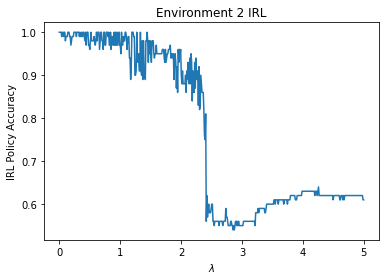

In [79]:
plt.plot(np.linspace(0,5,500),IRL_2_accuracy)
plt.xlabel("$\lambda$"); plt.ylabel("IRL Policy Accuracy"); plt.title("Environment 2 IRL")
plt.show()

In [103]:
np.linspace(0,5,500)[np.array(IRL_2_accuracy) == 1.0]

array([0.        , 0.01002004, 0.02004008, 0.03006012, 0.0501002 ,
       0.06012024, 0.08016032, 0.09018036, 0.14028056, 0.1503006 ,
       0.16032064, 0.24048096, 0.250501  , 0.26052104, 0.27054108,
       0.29058116, 0.3006012 , 0.31062124, 0.32064128, 0.34068136,
       0.37074148, 0.39078156, 0.4008016 , 0.43086172, 0.4509018 ,
       0.46092184, 0.47094188, 0.52104208, 0.61122244, 0.63126253,
       0.64128257, 0.65130261, 0.68136273, 0.69138277, 0.73146293,
       0.74148297, 0.77154309, 0.78156313, 0.79158317, 0.81162325,
       0.84168337, 0.90180361, 0.92184369, 0.94188377, 0.97194389,
       0.98196393, 1.02204409, 1.08216433, 1.09218437, 1.19238477,
       1.20240481, 1.21242485, 1.27254509, 1.33266533, 1.44288577])

In [119]:
R_max = environment2.reward_space.max()
P_optimal = get_optimal_policy_transition_matrix(environment2,policy2)
P_As = get_same_action_policy_transition_matrices(environment2)
b,Ds = get_b_D_block_matrices(environment2,discount_factor,policy2,P_optimal,P_As)

c = get_c_block_matrices(environment2,0.77154309)
R_IRL = linear_solve_IRL(environment2,b,c,Ds).reshape(environment2.reward_space.shape)

environment_IRL = RL_environment(environment2.state_space,R_IRL,N_actions,w)
value_IRL,policy_IRL = value_iteration(environment_IRL,threshold,discount_factor)


In [120]:
value_IRL.min()

-16.007687280689545

In [121]:
value_IRL.max()

485.83075939993375

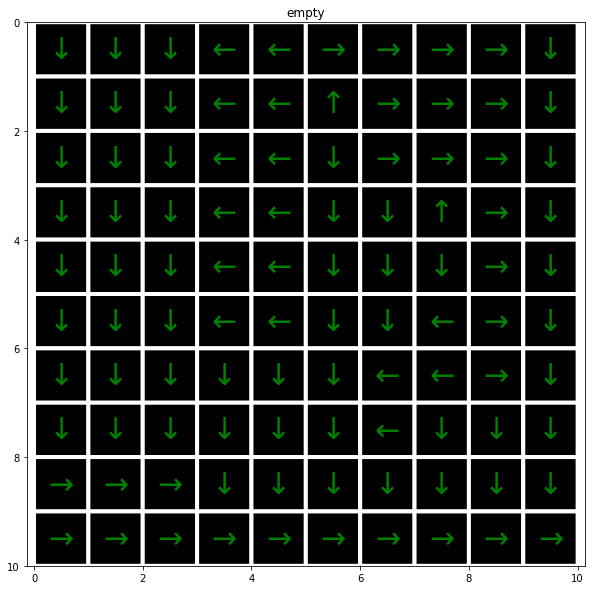

In [122]:
plt.figure(figsize=(10,10))
create_difference_policymap(policy_IRL,policy2)

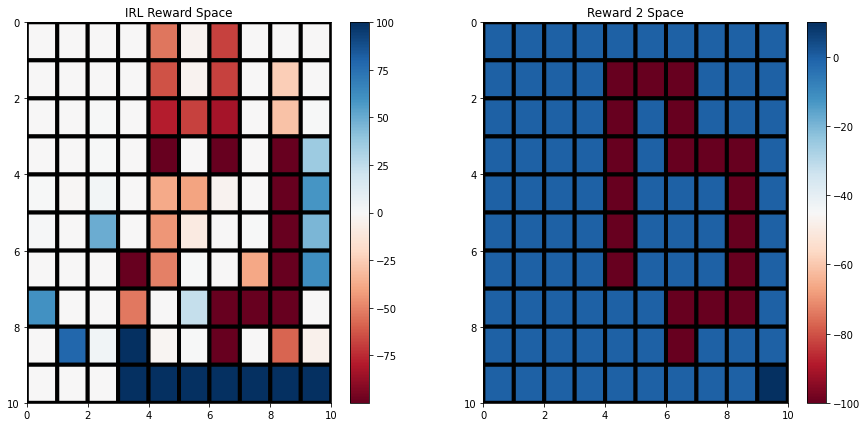

In [123]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
create_heatmap(R_IRL,"IRL Reward Space")
plt.subplot(1,2,2)
create_heatmap(environment2.reward_space,'Reward 2 Space')

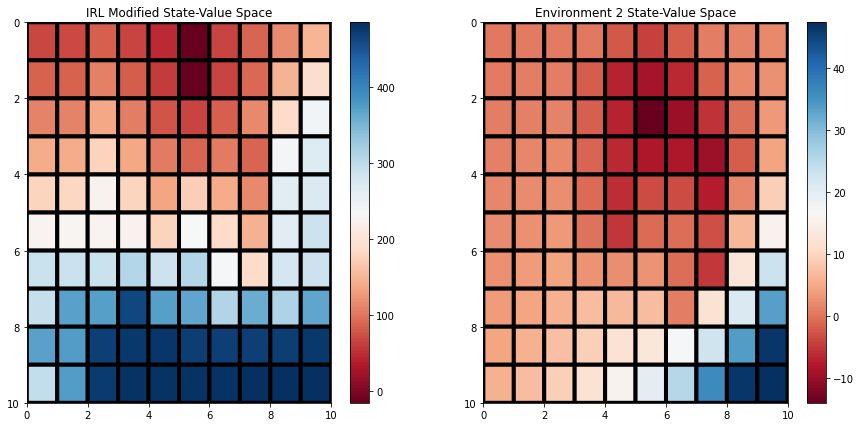

In [124]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
create_heatmap(value_IRL,"IRL Modified State-Value Space")
plt.subplot(1,2,2)
create_heatmap(V2,'Environment 2 State-Value Space')

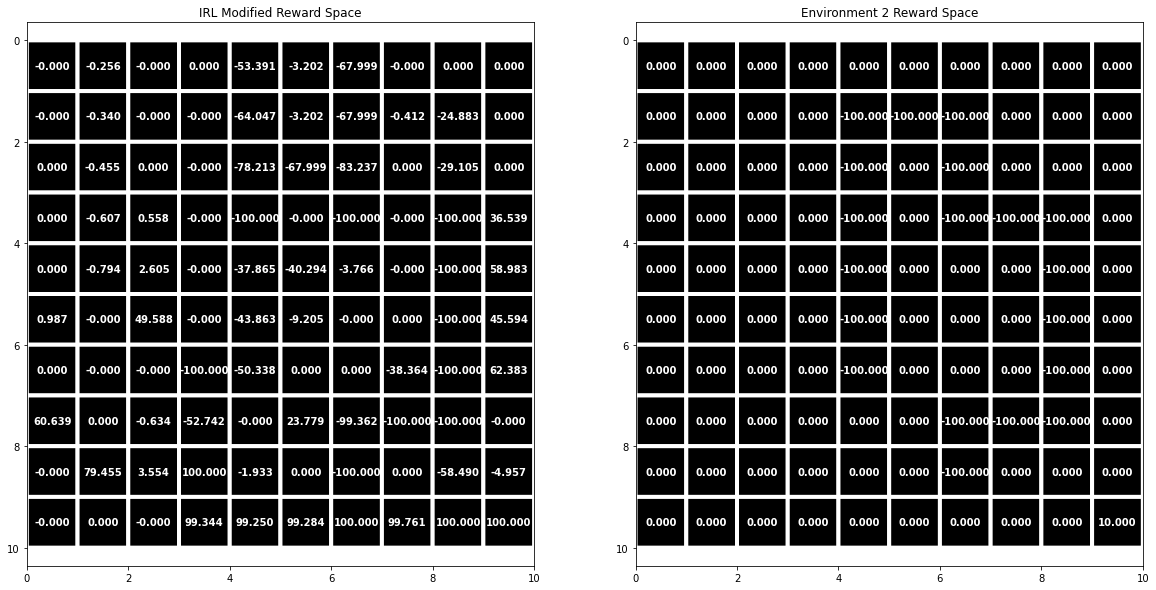

In [125]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
create_rewardmap(R_IRL,"IRL Modified Reward Space")
plt.subplot(1,2,2)
create_rewardmap(R2,'Environment 2 Reward Space')

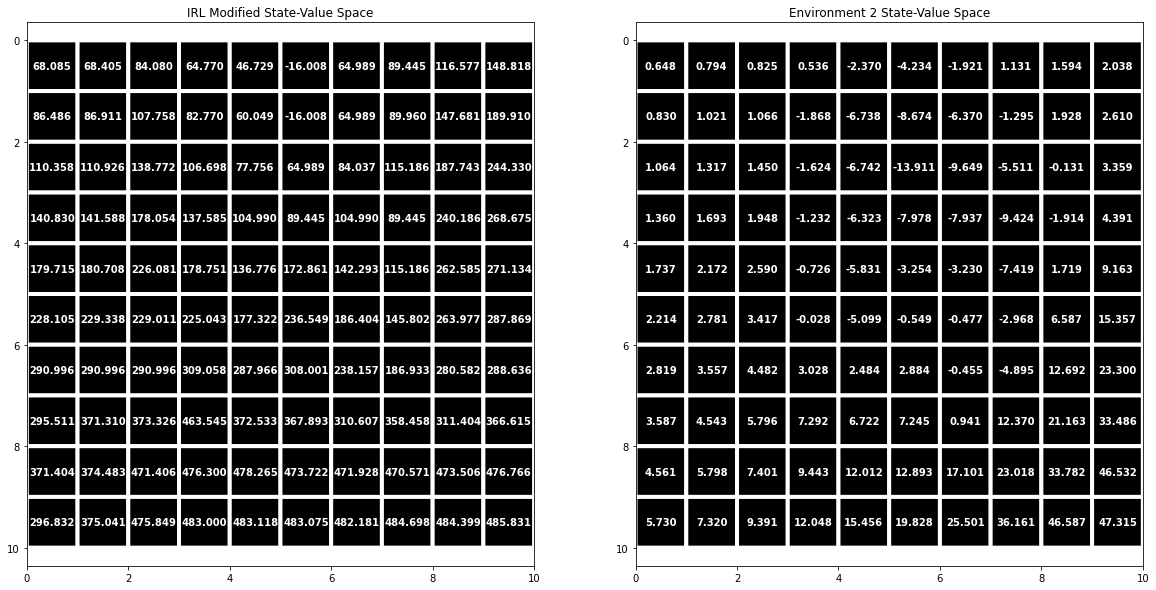

In [126]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
create_rewardmap(value_IRL,"IRL Modified State-Value Space")
plt.subplot(1,2,2)
create_rewardmap(V2,'Environment 2 State-Value Space')

### Dummy Problem

In [70]:
S = S1[:5,:5]
R = np.zeros((5,5))
R[4,4] = 1

In [71]:
f = RL_environment(S,R,4,.1)

In [72]:
value,policy = value_iteration(f,0.001,0.2)

In [73]:
P_optimal = get_optimal_policy_transition_matrix(f,policy)
P_As = get_same_action_policy_transition_matrices(f)
b,Ds = get_b_D_block_matrices(f,.2,policy,P_optimal,P_As)
c = get_c_block_matrices(f,1.5)
R_IRL = linear_solve_IRL(f,b,c,Ds).reshape(f.reward_space.shape)

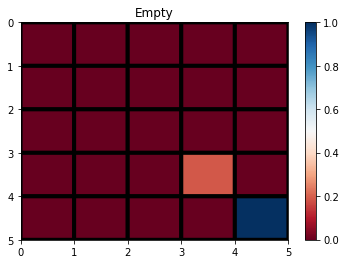

In [74]:
create_heatmap(R_IRL)

In [75]:
environment_IRL = RL_environment(f.state_space,R_IRL,4,w)
value_IRL,policy_IRL = value_iteration(environment_IRL,threshold,.2)

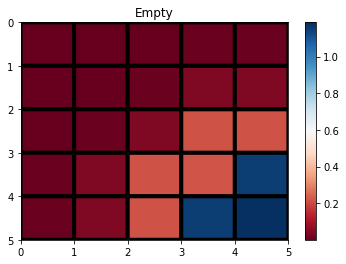

In [76]:
create_heatmap(value_IRL)